In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

#### Data Reading

In [2]:
#Data Reading
df= pd.read_csv(r'1806405.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR llc,2019-10-24 00:00:00,2019.0,1.930008e+09,2019-10-13,20191012,20191013,20191028.0,USD,RV,1.0,NaN,14643.09,20191013.0,NAH4,1.930008e+09,0
1,U001,0200707005,KING S corp,2019-03-13 00:00:00,2019.0,1.928852e+09,2019-02-26,20190224,20190226,20190313.0,USD,RV,1.0,NaN,12097.22,20190226.0,NAA8,1.928852e+09,0
2,U001,0200769623,WAL-MAR corp,2019-10-21 00:00:00,2019.0,1.929989e+09,2019-10-10,20191009,20191010,20191025.0,USD,RV,1.0,NaN,34973.87,20191010.0,NAH4,1.929989e+09,0
3,U001,CCU013,KRAFT F foundation,2019-05-31 00:00:00,2019.0,1.929151e+09,2019-04-16,20190415,20190416,20190416.0,USD,RV,1.0,NaN,53777.52,20190416.0,NAX2,1.929151e+09,0
4,U001,0200726979,BJ'S us,2019-02-25 00:00:00,2019.0,1.928775e+09,2019-02-10,20190209,20190210,20190225.0,USD,RV,1.0,NaN,59.16,20190210.0,NAA8,1.928775e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200782001,GORDO us,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200316,20200331.0,USD,RV,1.0,NaN,37920.98,20200316.0,NAA8,1.930655e+09,1
49996,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930860e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,1084.68,20200506.0,NAH4,1.930860e+09,1
49997,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,3377.09,20200417.0,NAH4,1.930793e+09,1
49998,U001,0200353024,DECA trust,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,658.62,20200416.0,NAM4,1.930818e+09,1


In [3]:
#difference between clear date & due date, i.e. delay of the payment 
df['TARGET']= 0

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,TARGET
0,U001,0200769623,WAL-MAR llc,2019-10-24 00:00:00,2019.0,1.930008e+09,2019-10-13,20191012,20191013,20191028.0,USD,RV,1.0,NaN,14643.09,20191013.0,NAH4,1.930008e+09,0,0
1,U001,0200707005,KING S corp,2019-03-13 00:00:00,2019.0,1.928852e+09,2019-02-26,20190224,20190226,20190313.0,USD,RV,1.0,NaN,12097.22,20190226.0,NAA8,1.928852e+09,0,0
2,U001,0200769623,WAL-MAR corp,2019-10-21 00:00:00,2019.0,1.929989e+09,2019-10-10,20191009,20191010,20191025.0,USD,RV,1.0,NaN,34973.87,20191010.0,NAH4,1.929989e+09,0,0
3,U001,CCU013,KRAFT F foundation,2019-05-31 00:00:00,2019.0,1.929151e+09,2019-04-16,20190415,20190416,20190416.0,USD,RV,1.0,NaN,53777.52,20190416.0,NAX2,1.929151e+09,0,0
4,U001,0200726979,BJ'S us,2019-02-25 00:00:00,2019.0,1.928775e+09,2019-02-10,20190209,20190210,20190225.0,USD,RV,1.0,NaN,59.16,20190210.0,NAA8,1.928775e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200782001,GORDO us,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200316,20200331.0,USD,RV,1.0,NaN,37920.98,20200316.0,NAA8,1.930655e+09,1,0
49996,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930860e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,1084.68,20200506.0,NAH4,1.930860e+09,1,0
49997,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,3377.09,20200417.0,NAH4,1.930793e+09,1,0
49998,U001,0200353024,DECA trust,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,658.62,20200416.0,NAM4,1.930818e+09,1,0


In [4]:
#Data preprocessing

#### Data Preprocessing

In [5]:
ds=pd.DataFrame(df[(df['clear_date'].isnull())==False])
dp=pd.DataFrame(df[(df['clear_date'].isnull())==True])
#ds is the sample on which the train set is made, rest is for test as it has target as null
#dp is the sample on which the prediction is to be made.

In [6]:
#making a seprate index which starts from 0
dp.reset_index(inplace= True)
dp.drop(columns='index',axis=1,inplace= True)

In [7]:
dp

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,TARGET
0,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930732e+09,2020-04-02,20200402,20200402,20200417.0,USD,RV,1.0,NaN,19784.74,20200402.0,NAH4,1.930732e+09,1,0
1,CA02,0140104429,COSTCO trust,NaN,2020.0,2.960623e+09,2020-03-22,20200322,20200322,20200403.0,CAD,RV,1.0,NaN,5473.27,20200324.0,CA10,2.960623e+09,1,0
2,U001,0200772595,SAFEW corp,NaN,2020.0,1.930769e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,NaN,37214.64,20200409.0,NAA8,1.930769e+09,1,0
3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930822e+09,2020-04-24,20200423,20200424,20200509.0,USD,RV,1.0,NaN,39947.38,20200424.0,NAH4,1.930822e+09,1,0
4,U001,0200793568,SUPE llc,NaN,2020.0,1.930784e+09,2020-04-13,20200414,20200413,20200428.0,USD,RV,1.0,NaN,104325.98,20200413.0,NAA8,1.930784e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,U001,200782001,GORDO us,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200316,20200331.0,USD,RV,1.0,NaN,37920.98,20200316.0,NAA8,1.930655e+09,1,0
3599,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930860e+09,2020-05-06,20200505,20200506,20200521.0,USD,RV,1.0,NaN,1084.68,20200506.0,NAH4,1.930860e+09,1,0
3600,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,3377.09,20200417.0,NAH4,1.930793e+09,1,0
3601,U001,0200353024,DECA trust,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,658.62,20200416.0,NAM4,1.930818e+09,1,0


In [8]:
ds[ds['invoice_currency']=='CAD'].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,TARGET
26,CA02,0140120967,VEG PR corporation,2019-08-30 00:00:00,2019.0,2.960574e+09,2019-08-19,20190819,20190819,20190831.0,CAD,RV,1.0,NaN,65530.07,20190821.0,CA10,2.960574e+09,0,0
29,CA02,0140104423,METRO,2020-01-17 00:00:00,2020.0,2.960606e+09,2020-01-07,20200107,20200107,20200119.0,CAD,RV,1.0,NaN,54337.54,20200109.0,CA10,2.960606e+09,0,0
34,CA02,0140104429,COSTCO foundation,2019-02-20 00:00:00,2019.0,2.960526e+09,2019-02-04,20190204,20190204,20190215.0,CAD,RV,1.0,NaN,6372.28,20190205.0,CA10,2.960526e+09,0,0
46,CA02,0140118172,AGR corp,2019-09-03 00:00:00,2019.0,2.960574e+09,2019-08-20,20190820,20190820,20190920.0,CAD,RV,1.0,NaN,134610.58,20190821.0,CA30,2.960574e+09,0,0
48,CA02,0140106408,WAL-M trust,2019-12-05 00:00:00,2019.0,2.960594e+09,2019-11-19,20191119,20191119,20191130.0,CAD,RV,1.0,NaN,92793.22,20191120.0,CA10,2.960594e+09,0,0


In [9]:
#checking datatypes of each columns
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
TARGET                      int64
dtype: object

In [10]:
#for Train Set Currency normalised from CAD to USD 
for i in range(len(ds)) : 
  if(ds.loc[i,'invoice_currency']=='CAD'):
    ds.loc[i,'total_open_amount']= ds.loc[i,'total_open_amount']*0.79

In [11]:
#for Test Set Currency normalised from CAD to USD 
for j in range((len(dp))) : 
  if(dp.loc[j,'invoice_currency']=='CAD'):
    dp.loc[j,'total_open_amount']= dp.loc[j,'total_open_amount']*0.79

In [12]:
#null check
ds[ds.columns].isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46397
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
TARGET                        0
dtype: int64

In [13]:
ds.drop('area_business', axis=1,inplace=True)
#dropped because of column contains all null values, hence constant column 

dp.drop('area_business', axis=1,inplace=True)
#doing same on the test set 

In [14]:
#converting all dates to specific date datatype in train sample

ds['clear_date']= pd.to_datetime(ds['clear_date'])
ds['posting_date']= pd.to_datetime(ds['posting_date'])
ds['document_create_date']= pd.to_datetime(ds['document_create_date'], format='%Y%m%d') 
ds['document_create_date.1']= pd.to_datetime(ds['document_create_date.1'], format='%Y%m%d') 
ds['due_in_date']= pd.to_datetime(ds['due_in_date'], format='%Y%m%d') 
ds['baseline_create_date']= pd.to_datetime(ds['baseline_create_date'], format='%Y%m%d') 

#converting all dates to specific date datatype in test sample
dp['clear_date']= pd.to_datetime(dp['clear_date'])
dp['posting_date']= pd.to_datetime(dp['posting_date'])
dp['document_create_date']= pd.to_datetime(dp['document_create_date'], format='%Y%m%d') 
dp['document_create_date.1']= pd.to_datetime(dp['document_create_date.1'], format='%Y%m%d') 
dp['due_in_date']= pd.to_datetime(dp['due_in_date'], format='%Y%m%d') 
dp['baseline_create_date']= pd.to_datetime(dp['baseline_create_date'], format='%Y%m%d') 

In [15]:
#Putting values in taget column
#Target is the difference between due date & clear date,(i.e. delay), we have to predict this on test set
ds['TARGET']=(ds['clear_date']-ds['due_in_date']).dt.days
ds

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,TARGET
0,U001,0200769623,WAL-MAR llc,2019-10-24,2019.0,1.930008e+09,2019-10-13,2019-10-12,2019-10-13,2019-10-28,USD,RV,1.0,14643.0900,2019-10-13,NAH4,1.930008e+09,0,-4
1,U001,0200707005,KING S corp,2019-03-13,2019.0,1.928852e+09,2019-02-26,2019-02-24,2019-02-26,2019-03-13,USD,RV,1.0,12097.2200,2019-02-26,NAA8,1.928852e+09,0,0
2,U001,0200769623,WAL-MAR corp,2019-10-21,2019.0,1.929989e+09,2019-10-10,2019-10-09,2019-10-10,2019-10-25,USD,RV,1.0,34973.8700,2019-10-10,NAH4,1.929989e+09,0,-4
3,U001,CCU013,KRAFT F foundation,2019-05-31,2019.0,1.929151e+09,2019-04-16,2019-04-15,2019-04-16,2019-04-16,USD,RV,1.0,53777.5200,2019-04-16,NAX2,1.929151e+09,0,45
4,U001,0200726979,BJ'S us,2019-02-25,2019.0,1.928775e+09,2019-02-10,2019-02-09,2019-02-10,2019-02-25,USD,RV,1.0,59.1600,2019-02-10,NAA8,1.928775e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46392,CA02,0140104240,FEDER,2019-04-02,2019.0,2.960537e+09,2019-03-22,2019-03-22,2019-03-22,2019-04-08,CAD,RV,1.0,118720.8050,2019-03-29,CA10,2.960537e+09,0,-6
46393,U001,200230690,DECA associates,2019-07-12,2019.0,1.929570e+09,2019-07-03,2019-07-03,2019-07-03,2019-07-11,USD,RV,1.0,1750.7800,2019-07-01,NAM2,1.929570e+09,0,1
46394,CA02,0140104440,SO systems,2019-02-19,2019.0,2.960526e+09,2019-01-31,2019-01-31,2019-01-31,2019-02-11,CAD,RV,1.0,232991.4294,2019-02-01,CA10,2.960526e+09,0,8
46395,U001,0200152991,JET llc,2019-07-26,2019.0,1.929608e+09,2019-07-11,2019-07-11,2019-07-11,2019-07-26,USD,RV,1.0,14098.1800,2019-07-11,NAA8,1.929608e+09,0,0


In [16]:
#checking which column is more close to baseline_create_date
print(((ds['baseline_create_date']-ds['document_create_date.1'])=='0 days').sum())
print(((ds['baseline_create_date']-ds['document_create_date'])=='0 days').sum())

41252
14788


In [17]:
#document_create_date.1 & document_create_date has more or less same values and ambigous
#as document_create_date.1 is more similar to baseline_create_date than document_create_date  
#so it is good to drop document_create_date.1

ds.drop('document_create_date.1', axis=1,inplace=True)

dp.drop('document_create_date.1', axis=1,inplace=True)
#doing same in test set

In [18]:
#Creating Train & Validation sets

#### Train & Validation Split

In [21]:
ds=ds.sort_values(by='posting_date')
ds

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,TARGET
1740,U001,0200466603,SMITH'S co,2019-01-14,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,118687.65,2018-12-30,NAA8,1.928538e+09,0,0
21458,U001,0100000533,BEST us,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-29,USD,RV,1.0,625.00,2018-12-30,NAD5,1.928542e+09,0,-15
14299,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,14449.57,2018-12-30,NAH4,1.928533e+09,0,-5
44360,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,10856.49,2018-12-30,NAH4,1.928543e+09,0,-4
42222,U001,0200794332,COST us,2019-01-15,2019.0,1.928535e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,51473.49,2018-12-30,NAAX,1.928535e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,U001,0200793830,M foundation,2020-03-04,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,51813.42,2020-02-26,NAA8,1.930571e+09,0,-8
29851,U001,0200759878,SA associates,2020-03-13,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-03-13,USD,RV,1.0,21815.07,2020-02-27,NAH4,1.930569e+09,0,0
12329,U001,0200759878,SA,2020-03-13,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,15005.29,2020-02-27,NAH4,1.930571e+09,0,0
33777,U001,0200413833,LDC corp,2020-03-20,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,USD,RV,1.0,28311.65,2020-02-27,NAA8,1.930566e+09,0,7


In [22]:
#splitting train data for madel training & valdidation testing,i.e. splitting in train set & validiation set
#train set : validation set = 7:3
#here i spliited according to time because actully i am goint to predict about future dates.
x_train, x_test, y_train, y_test = train_test_split(ds.drop(columns=['TARGET']), ds['TARGET'], test_size = 0.3,shuffle=False)
#x_train, x_test, y_train, y_test = train_test_split(ds.drop(columns=['TARGET']), ds['TARGET'], test_size = 0.3)

In [23]:
#I first splitted the train data according to time series but none of my model performed well 
#The model was OverFitted, therefore i switched to random split.

In [24]:
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
37908,U001,0200881076,ALBERT trust,2019-11-18,2019.0,1.929989e+09,2019-10-09,2019-10-09,2019-11-18,USD,RV,1.0,10658.31,2019-10-09,NAWU,1.929989e+09,0
25645,U001,0200881076,ALBERT corp,2019-10-24,2019.0,1.929989e+09,2019-10-09,2019-10-09,2019-10-24,USD,RV,1.0,961.53,2019-10-09,NAA8,1.929989e+09,0
35912,U001,0200772670,ASSOCIAT,2019-11-18,2019.0,1.929989e+09,2019-10-09,2019-10-09,2019-11-18,USD,RV,1.0,3215.48,2019-10-09,NAWU,1.929989e+09,0
2350,U001,0200936373,SUPE trust,2019-10-24,2019.0,1.929993e+09,2019-10-09,2019-10-09,2019-10-24,USD,RV,1.0,11612.70,2019-10-09,NAA8,1.929993e+09,0
18042,U001,0200126819,MCLANE trust,2019-10-23,2019.0,1.929977e+09,2019-10-09,2019-10-07,2019-10-24,USD,RV,1.0,8213.75,2019-10-09,NAA8,1.929977e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,U001,0200793830,M foundation,2020-03-04,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,51813.42,2020-02-26,NAA8,1.930571e+09,0
29851,U001,0200759878,SA associates,2020-03-13,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-03-13,USD,RV,1.0,21815.07,2020-02-27,NAH4,1.930569e+09,0
12329,U001,0200759878,SA,2020-03-13,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,15005.29,2020-02-27,NAH4,1.930571e+09,0
33777,U001,0200413833,LDC corp,2020-03-20,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,USD,RV,1.0,28311.65,2020-02-27,NAA8,1.930566e+09,0


In [25]:
x_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1740,U001,0200466603,SMITH'S co,2019-01-14,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,118687.65,2018-12-30,NAA8,1.928538e+09,0
21458,U001,0100000533,BEST us,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-29,USD,RV,1.0,625.00,2018-12-30,NAD5,1.928542e+09,0
14299,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,14449.57,2018-12-30,NAH4,1.928533e+09,0
44360,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,10856.49,2018-12-30,NAH4,1.928543e+09,0
42222,U001,0200794332,COST us,2019-01-15,2019.0,1.928535e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,51473.49,2018-12-30,NAAX,1.928535e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45563,U001,0200803720,DEC foundation,2019-10-16,2019.0,1.929988e+09,2019-10-09,2019-10-09,2019-10-24,USD,RV,1.0,10976.38,2019-10-01,NAM4,1.929988e+09,0
31132,U001,0200769623,WAL-MAR trust,2019-10-21,2019.0,1.929984e+09,2019-10-09,2019-10-08,2019-10-24,USD,RV,1.0,20876.66,2019-10-09,NAH4,1.929984e+09,0
31105,U001,0200707822,PUBLI corp,2019-10-24,2019.0,1.929990e+09,2019-10-09,2019-10-09,2019-10-24,USD,RV,1.0,136412.48,2019-10-09,NAA8,1.929990e+09,0
43542,U001,0200769623,WAL-MAR in,2019-10-28,2019.0,1.929988e+09,2019-10-09,2019-10-09,2019-10-24,USD,RV,1.0,18101.55,2019-10-09,NAH4,1.929988e+09,0


In [26]:
#Feature Engg

#### Feature Engineering

In [27]:
#creating features from dates
#extracting week of the year, month, year, quarter

x_train['posting_day']=x_train['posting_date'].dt.day
x_train['posting_nweek']= x_train['posting_date'].dt.isocalendar().week.astype(int)
x_train['posting_month']= x_train['posting_date'].dt.month
x_train['posting_year']= x_train['posting_date'].dt.year
x_train['posting_quarter']= x_train['posting_date'].dt.quarter

x_train['baseline_day']=x_train['baseline_create_date'].dt.day
x_train['baseline_nweek']=x_train['baseline_create_date'].dt.isocalendar().week.astype(int)
x_train['baseline_month']= x_train['baseline_create_date'].dt.month
x_train['baseline_year']= x_train['baseline_create_date'].dt.year
x_train['baseline_quarter']= x_train['baseline_create_date'].dt.quarter

x_train['due_in_date_day']=x_train['due_in_date'].dt.day
x_train['due_in_date_nweek']= x_train['due_in_date'].dt.isocalendar().week.astype(int)
x_train['due_in_date_month']= x_train['due_in_date'].dt.month
x_train['due_in_date_year']= x_train['due_in_date'].dt.year
x_train['due_in_date_quarter']= x_train['due_in_date'].dt.quarter

x_test['posting_day']=x_test['posting_date'].dt.day
x_test['posting_nweek']= x_test['posting_date'].dt.isocalendar().week.astype(int)
x_test['posting_month']= x_test['posting_date'].dt.month
x_test['posting_year']= x_test['posting_date'].dt.year
x_test['posting_quarter']= x_test['posting_date'].dt.quarter

x_test['baseline_day']=x_test['baseline_create_date'].dt.day
x_test['baseline_nweek']=x_test['baseline_create_date'].dt.isocalendar().week.astype(int)
x_test['baseline_month']= x_test['baseline_create_date'].dt.month
x_test['baseline_year']= x_test['baseline_create_date'].dt.year
x_test['baseline_quarter']= x_test['baseline_create_date'].dt.quarter

x_test['due_in_date_day']=x_test['due_in_date'].dt.day
x_test['due_in_date_nweek']= x_test['due_in_date'].dt.isocalendar().week.astype(int)
x_test['due_in_date_month']= x_test['due_in_date'].dt.month
x_test['due_in_date_year']= x_test['due_in_date'].dt.year
x_test['due_in_date_quarter']= x_test['due_in_date'].dt.quarter


dp['posting_day']=dp['posting_date'].dt.day
dp['posting_nweek']= dp['posting_date'].dt.isocalendar().week.astype(int)
dp['posting_month']= dp['posting_date'].dt.month
dp['posting_year']= dp['posting_date'].dt.year
dp['posting_quarter']= dp['posting_date'].dt.quarter

dp['baseline_day']=dp['baseline_create_date'].dt.day
dp['baseline_nweek']=dp['baseline_create_date'].dt.isocalendar().week.astype(int)
dp['baseline_month']= dp['baseline_create_date'].dt.month
dp['baseline_year']= dp['baseline_create_date'].dt.year
dp['baseline_quarter']= dp['baseline_create_date'].dt.quarter

dp['due_in_date_day']=dp['due_in_date'].dt.day
dp['due_in_date_nweek']= dp['due_in_date'].dt.isocalendar().week.astype(int)
dp['due_in_date_month']= dp['due_in_date'].dt.month
dp['due_in_date_year']= dp['due_in_date'].dt.year
dp['due_in_date_quarter']= dp['due_in_date'].dt.quarter


In [28]:
#creating a feature 
#Difference between due date & baseline create date     
x_train['diff_btw_did_bcd']= (x_train['due_in_date']-x_train['baseline_create_date']).dt.days

x_test['diff_btw_did_bcd']= (x_test['due_in_date']-x_test['baseline_create_date']).dt.days

dp['diff_btw_did_bcd']= (dp['due_in_date']-dp['baseline_create_date']).dt.days

In [29]:
#Label Encoding of document type column
x_train['document type'].unique()

array(['RV', 'X2'], dtype=object)

In [30]:
#label encoding of catgory column document type as it contains only 2 values.
doc={'RV':1,'X2':0}

x_train['document type']=x_train['document type'].map(doc)

x_test['document type']=x_test['document type'].map(doc)

dp['document type']=dp['document type'].map(doc)

In [31]:
#finding out catagories for creating labels
x_train['business_code'].unique()

array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [32]:
#Label encoding business_code column
buc={'U013':0, 'U001':1, 'CA02':2, 'U002':3, 'U005':4, 'U007':5}
x_train['business_code']=x_train['business_code'].map(buc)
x_test['business_code']=x_test['business_code'].map(buc)
dp['business_code']=dp['business_code'].map(buc)

In [33]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(32477, 33) (13920, 33)
(32477,) (13920,)


In [34]:
x_train.dtypes

business_code                    int64
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                    int64
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
posting_day                      int64
posting_nweek                    int32
posting_month                    int64
posting_year                     int64
posting_quarter                  int64
baseline_day                     int64
baseline_nweek                   int32
baseline_month                   int64
baseline_year            

#### Features Selection

In [35]:
#Feature Selection

#Here, I dropping the correlated,Quasi-constant,etc. features of input of train set
#so as enhance the algorithms efficiency. I have identified these columns in below steps.

#As the columns of train set are dropped, test set will also be modified exactly the same way.

#I am actually creating a subset dataframes which would contain only important columns.

#X is the subset of x_train.
#x is the subset of x_test.

In [36]:
X=x_train.drop(columns=['posting_quarter','baseline_day','business_code',
 'baseline_nweek',
 'due_in_date_quarter',
 'due_in_date_month',
 'baseline_quarter',
 'posting_month',
 'baseline_month',
 'due_in_date_nweek','buisness_year',
 'document type',
 'posting_year',
 'baseline_year',
 'due_in_date_year','name_customer','cust_number','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms','posting_id','invoice_id','doc_id','isOpen'])
x=x_test.drop(columns=['buisness_year','posting_quarter','baseline_day','business_code',
 'baseline_nweek',
 'due_in_date_quarter',
 'due_in_date_month',
 'baseline_quarter',
 'posting_month',
 'baseline_month',
 'due_in_date_nweek',
 'document type',
 'posting_year',
 'baseline_year',
 'due_in_date_year','name_customer','cust_number','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms','posting_id','invoice_id','doc_id','isOpen'])


In [37]:
#Doing same modification of colums in real Test Set.
#Here TARGET is extra feature which should be dropped now because it was dropped in test set while train_test split
#to create y_train & y_test

testset=dp.drop(columns=['buisness_year','posting_quarter','baseline_day','business_code','TARGET',
 'baseline_nweek',
 'due_in_date_quarter',
 'due_in_date_month',
 'baseline_quarter',
 'posting_month',
 'baseline_month',
 'due_in_date_nweek',
 'document type',
 'posting_year',
 'baseline_year',
 'due_in_date_year','name_customer','cust_number','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms','posting_id','invoice_id','doc_id','isOpen'])


In [38]:

# x1=x_train.drop(columns=['cust_number',
#  'due_in_date_year','name_customer','cust_number','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms','posting_id','invoice_id','doc_id','isOpen'])
# x2=x_test.drop(columns=['cust_number',
#  'due_in_date_year','name_customer','cust_number','clear_date','posting_date','document_create_date','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms','posting_id','invoice_id','doc_id','isOpen'])


In [39]:
#y_train.dtypes

In [40]:
#X.corr()

<AxesSubplot:>

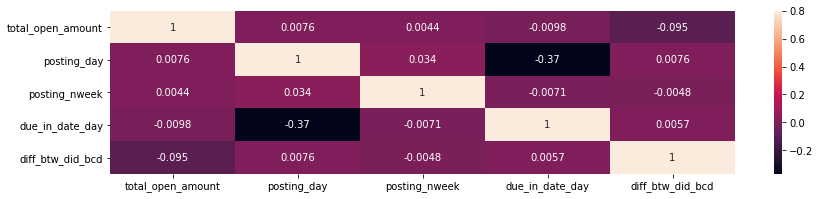

In [41]:
#Checking co-relation using heatmap
corr=X.corr()
plt.figure(figsize=(14,3))
sns.heatmap(corr,annot=True,vmax=.8)

In [42]:
#data_t=X.T
#data_t.duplicated().sum()

In [43]:
sel = VarianceThreshold(
    threshold=0.8)  # 0.8 indicates 20% of observations approximately

sel.fit(X)  # fit finds the features with low variance


VarianceThreshold(threshold=0.8)

In [44]:
sum(sel.get_support())
#shows that are not quasi constant

5

In [45]:
#quasi constant features
print(
    len([
        y for y in X.columns
        if y not in X.columns[sel.get_support()]
    ]))

[y for y in X.columns if y not in X.columns[sel.get_support()]]

0


[]

In [46]:
# def correlatedCols(v,threshold=0.8):
#     # creating set to hold the correlated features
#     corr_features = set()
#     # create the correlation matrix (default to pearson)
#     corr_matrix = v.corr()
#     #code for selecting all correleated features
#     for i in range(len(corr_matrix .columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) >threshold:
#                 colname = corr_matrix.columns[i]
#                 corr_features.add(colname)
#     return list(corr_features)

# correlatedCols(X.copy(),0.8)

In [47]:
#X.columns

In [48]:
#sns.distplot(X['total_open_amount'])


In [49]:
#Outlier Detection
# tfq=X['diff_btw_did_bcd'].quantile(0.25)
# sfq=X['diff_btw_did_bcd'].quantile(0.75)
# iqr=(sfq-tfq)

# lb= tfq-1.5*iqr
# up= sfq+1.5*iqr
# med=X['diff_btw_did_bcd'].median()
# med


In [50]:

# print((X['diff_btw_did_bcd']>up).sum())
# print((X['diff_btw_did_bcd']<lb).sum())


In [51]:
# X['diff_btw_did_bcd'][(X['diff_btw_did_bcd']>up)]=med
# X['diff_btw_did_bcd'][(X['diff_btw_did_bcd']<lb)]=med


In [52]:
# tfq=X['total_open_amount'].quantile(0.25)
# sfq=X['total_open_amount'].quantile(0.75)
# iqr=(sfq-tfq)

# lb= tfq-1.5*iqr
# up= sfq+1.5*iqr
# med=X['total_open_amount'].median()
# med

In [53]:

# print((X['total_open_amount']>up).sum())
# print((X['total_open_amount']<lb).sum())


In [54]:
#X['total_open_amount'][(X['total_open_amount']>up)]=med

In [55]:
X.dtypes

total_open_amount    float64
posting_day            int64
posting_nweek          int32
due_in_date_day        int64
diff_btw_did_bcd       int64
dtype: object

In [56]:
#Modelling

#### Modelling

In [57]:
#Linear Regression model

In [58]:
score=pd.DataFrame(columns=['MODEL','MSE_Train','r2_Train','MSE_Test','r2_Test'])
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test


In [59]:
lin = LinearRegression()
lin.fit(X,y_train)


LinearRegression()

In [60]:
p= lin.predict(x) #predicting on testset 
q= lin.predict(X) #predicting on train set

In [61]:
p

array([-3.19958005,  1.39833854, -3.16124976, ...,  1.73680026,
        1.668273  ,  1.78720382])

In [62]:
y_test

37908    0
25645    0
35912    0
2350     0
18042   -1
        ..
19727   -8
29851    0
12329    0
33777    7
27853   -1
Name: TARGET, Length: 13920, dtype: int64

In [63]:
mean_squared_error(y_test, p)

68.47536066543418

In [64]:
mean_squared_error(y_train,q )

123.33529310132737

In [65]:
e=['LinearRegression',mean_squared_error(y_train, q),r2_score(y_train, q),mean_squared_error(y_test,p ),r2_score(y_test, p)]

In [66]:
#storing for future examination
score.loc[len(score.index)]=e
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test
0,LinearRegression,123.335293,0.034437,68.475361,0.088488


In [67]:
###################

In [68]:
#Support Vector Regression

In [69]:
sv = SVR()
sv.fit(X, y_train)

SVR()

In [70]:
p = sv.predict(X) #predicting on trainset
q = sv.predict(x) #predicting on testset 

In [71]:
mean_squared_error(y_train, p)

128.79992571839082

In [72]:
mean_squared_error(y_test,q )

75.2174569067411

In [73]:
e=['SVR',mean_squared_error(y_train, p),r2_score(y_train, p),mean_squared_error(y_test,q ),r2_score(y_test, q)]

In [74]:
#storing for future examination
score.loc[len(score.index)]=e

In [75]:
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test
0,LinearRegression,123.335293,0.034437,68.475361,0.088488
1,SVR,128.799926,-0.008344,75.217457,-0.001260


In [76]:
#########################

In [77]:
#Decision Tree Regression

In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y_train)

DecisionTreeRegressor()

In [79]:
p = dtr.predict(x) #predicting on testset 

In [80]:
q= dtr.predict(X) #predicting on trainset 

In [81]:
mean_squared_error(y_test, p)

130.563128591954

In [82]:
mean_squared_error(y_train,q )

0.10913107737783662

In [83]:
e=['DecisionTreeRegressor',mean_squared_error(y_train, q),r2_score(y_train, q),mean_squared_error(y_test,p ),r2_score(y_test, p)]

In [84]:
#storing for future examination
score.loc[len(score.index)]=e

In [85]:
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test
0,LinearRegression,123.335293,0.034437,68.475361,0.088488
1,SVR,128.799926,-0.008344,75.217457,-0.001260
2,DecisionTreeRegressor,0.109131,0.999146,130.563129,-0.737996


In [86]:
##########################################

In [87]:
#HyperParameter tuning for Random Forest regression

In [88]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[20,30,50,70,90]
min_samples_split=[25,35,45,55,65]
min_samples_leaf=[2,3,5,7,10]

grid_param={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [89]:
RFR=RandomForestRegressor()
RFR_r=RandomizedSearchCV(estimator=RFR, param_distributions=grid_param, n_iter=10,cv=5,n_jobs=3)

In [90]:
RFR_r.fit(X,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=3,
                   param_distributions={'min_samples_leaf': [2, 3, 5, 7, 10],
                                        'min_samples_split': [25, 35, 45, 55,
                                                              65],
                                        'n_estimators': [20, 30, 50, 70, 90]})

In [91]:
print(RFR_r.best_params_)

{'n_estimators': 30, 'min_samples_split': 45, 'min_samples_leaf': 10}


In [92]:
rfr = RandomForestRegressor(n_estimators=30, min_samples_split=45, min_samples_leaf=10)
rfr.fit(X, y_train)

RandomForestRegressor(min_samples_leaf=10, min_samples_split=45,
                      n_estimators=30)

In [93]:
p = rfr.predict(X) #predicting on trainset 
q = rfr.predict(x) #predicting on testset 

In [94]:
mean_squared_error(y_train, p)

76.18339385694368

In [95]:
mean_squared_error(y_test, q)

48.117622235198525

In [96]:
e=['RandomForestRegressor',mean_squared_error(y_train, p),r2_score(y_train, p),mean_squared_error(y_test,q ),r2_score(y_test, q)]

In [97]:
#storing for future examination
score.loc[len(score.index)]=e

In [98]:
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test
0,LinearRegression,123.335293,0.034437,68.475361,0.088488
1,SVR,128.799926,-0.008344,75.217457,-0.001260
2,DecisionTreeRegressor,0.109131,0.999146,130.563129,-0.737996
3,RandomForestRegressor,76.183394,0.403578,48.117622,0.359481


In [99]:
##############################

In [100]:
#Hyperparameter tuning for XGBRegression

In [101]:
n_estimators = [20,30,50,70,90]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    }

In [102]:
random_cv = RandomizedSearchCV(estimator=xgb.XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,n_jobs = 4)

In [103]:
random_cv.fit(X,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [104]:
random_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 70}

In [105]:
xgbr=xgb.XGBRegressor(learning_rate= 0.05,
 max_depth= 5,
 min_child_weight= 3,
 n_estimators=70)

xgbr.fit(X,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
p = xgbr.predict(X)
q = xgbr.predict(x)

In [107]:
mean_squared_error(y_train, p)

85.06798696449347

In [108]:
mean_squared_error(y_test, q)

47.65047537474021

In [109]:
r2_score(y_test, q)

0.3656990070372611

In [110]:
e=['XGBRegressor',mean_squared_error(y_train, p),r2_score(y_train, p),mean_squared_error(y_test,q ),r2_score(y_test, q)]

In [111]:
#storing for future examination
score.loc[len(score.index)]=e

In [112]:
#Compairing & selecting the best model.

In [113]:
score

,MODEL,MSE_Train,r2_Train,MSE_Test,r2_Test
0,LinearRegression,123.335293,0.034437,68.475361,0.088488
1,SVR,128.799926,-0.008344,75.217457,-0.001260
2,DecisionTreeRegressor,0.109131,0.999146,130.563129,-0.737996
3,RandomForestRegressor,76.183394,0.403578,48.117622,0.359481
4,XGBRegressor,85.067987,0.334023,47.650475,0.365699


In [120]:
pickle.dump(xgbr,open("my.pkl", 'wb'))

In [121]:
loaded_model = pickle.load(open("my.pkl", 'rb'))

In [122]:
result = loaded_model.predict(x)

In [123]:
result

array([5.554944  , 0.3789868 , 3.789819  , ..., 0.09955005, 0.09955005,
       0.14984088], dtype=float32)

In [112]:
#plt.scatter(y_test,q)

In [113]:
#Conclusion: 
# LinearRegression model had accuracy very less.
# SVR regression model r2_score was negative showing the model didn't follow the trend and fits badly.
# DecisionTreeRegression model was badly overfitted.
# Random Forest Regression along with hyperparameter tuning showed better results; it's performance was  
# consistant,i.e. almost same accuracy with validation & train set.
# XGB Regression along with hyperparameter tuning showed best results among all; it's performance was  
# more consistant.Therefore, I choose XGB Regression for futher prediction of clear date.

In [114]:
#######################################################

#### Final prediction

In [115]:
#Predicting the Target, i.e. delay from due date on real test set

In [116]:
x.dtypes

total_open_amount    float64
posting_day            int64
posting_nweek          int32
due_in_date_day        int64
diff_btw_did_bcd       int64
dtype: object

In [117]:
testset.dtypes

total_open_amount    float64
posting_day            int64
posting_nweek          int32
due_in_date_day        int64
diff_btw_did_bcd       int64
dtype: object

In [118]:
#Delay prediction from real Test Set using XGBregression model
delay= xgbr.predict(testset)

In [119]:
delay

array([ 0.51347584,  6.1840563 , -0.25200805, ...,  0.01294971,
       -5.948357  ,  0.17305079], dtype=float32)

In [120]:
add=pd.to_timedelta(delay,'D')
dp['due_in_date']+add

#delay is added to due_in_date to get the predicted payment date(i.e. clear_date)

0      2020-04-17 12:19:24.312144000
1      2020-04-09 04:25:02.462764799
2      2020-04-23 17:57:06.504393600
3      2020-05-08 22:56:20.238806400
4      2020-04-28 15:30:43.220880000
                    ...             
3598   2020-03-30 19:19:34.822128000
3599   2020-05-21 22:09:11.230473600
3600   2020-05-02 00:18:38.854684800
3601   2020-05-03 01:14:21.946128000
3602   2020-03-13 04:09:11.588342400
Length: 3603, dtype: datetime64[ns]

In [121]:
#putting the values in the respective column, that was initially empty.
dp['clear_date']=dp['due_in_date']+add

In [122]:
dp['TARGET']=delay

In [123]:
dp.T
#Transposeing dp to see all columns.

,0,1,2,3,4,5,6,7,8,9,...,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602
business_code,1,2,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
cust_number,0200769623,0140104429,0200772595,0200769623,0200793568,0200769623,0200750051,0200712105,0200794332,CC6000,...,0200769623,0200706844,0200936373,0200769623,0200706844,200782001,0200769623,0200769623,0200353024,0200780825
name_customer,WAL-MAR in,COSTCO trust,SAFEW corp,WAL-MAR,SUPE llc,WAL-MAR foundation,ALBER llc,WALG us,COST in,HEINZ,...,WAL-MAR foundation,WINC systems,SUPE corp,WAL-MAR foundation,WINC corporation,GORDO us,WAL-MAR in,WAL-MAR foundation,DECA trust,SYSCO FO systems
clear_date,2020-04-17 12:19:24.312144,2020-04-09 04:25:02.462764799,2020-04-23 17:57:06.504393600,2020-05-08 22:56:20.238806400,2020-04-28 15:30:43.220880,2020-03-25 01:03:00.626572800,2020-05-18 18:38:49.062076800,2020-05-13 11:48:19.338336,2020-04-16 18:12:49.159670400,2020-05-20 15:19:52.126464,...,2020-04-05 18:55:01.993296,2020-03-12 14:34:12.529344001,2020-03-23 17:57:06.504393600,2020-03-16 01:29:18.700195200,2020-05-14 03:11:21.813244799,2020-03-30 19:19:34.822128,2020-05-21 22:09:11.230473600,2020-05-02 00:18:38.854684800,2020-05-03 01:14:21.946128,2020-03-13 04:09:11.588342400
buisness_year,2020.000000,2020.000000,2020.000000,2020.00000,2020.000000,2020.000000,2020.000000,2020.00000,2020.000000,2020.000000,...,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.00000,2020.000000,2020.000000
doc_id,1930731562.000000,2960622961.000000,1930768746.000000,1930821930.00000,1930783509.000000,1930623835.000000,1930856421.000000,1930833739.00000,1930718973.000000,1991840241.000000,...,1930684500.000000,1930571340.000000,1930627840.000000,1930582902.000000,1930839030.000000,1930655234.000000,1930860095.000000,1930793366.00000,1930817937.000000,1930576249.000000
posting_date,2020-04-02 00:00:00,2020-03-22 00:00:00,2020-04-09 00:00:00,2020-04-24 00:00:00,2020-04-13 00:00:00,2020-03-10 00:00:00,2020-05-04 00:00:00,2020-04-28 00:00:00,2020-04-01 00:00:00,2020-03-13 00:00:00,...,2020-03-22 00:00:00,2020-02-27 00:00:00,2020-03-09 00:00:00,2020-03-01 00:00:00,2020-04-29 00:00:00,2020-03-16 00:00:00,2020-05-06 00:00:00,2020-04-17 00:00:00,2020-04-23 00:00:00,2020-02-27 00:00:00
document_create_date,2020-04-02 00:00:00,2020-03-22 00:00:00,2020-04-09 00:00:00,2020-04-23 00:00:00,2020-04-14 00:00:00,2020-03-09 00:00:00,2020-05-04 00:00:00,2020-04-28 00:00:00,2020-03-30 00:00:00,2020-03-13 00:00:00,...,2020-03-21 00:00:00,2020-02-26 00:00:00,2020-03-10 00:00:00,2020-02-29 00:00:00,2020-04-29 00:00:00,2020-03-16 00:00:00,2020-05-05 00:00:00,2020-04-16 00:00:00,2020-04-23 00:00:00,2020-02-27 00:00:00
due_in_date,2020-04-17 00:00:00,2020-04-03 00:00:00,2020-04-24 00:00:00,2020-05-09 00:00:00,2020-04-28 00:00:00,2020-03-25 00:00:00,2020-05-19 00:00:00,2020-05-13 00:00:00,2020-04-16 00:00:00,2020-04-27 00:00:00,...,2020-04-06 00:00:00,2020-03-13 00:00:00,2020-03-24 00:00:00,2020-03-16 00:00:00,2020-05-14 00:00:00,2020-03-31 00:00:00,2020-05-21 00:00:00,2020-05-02 00:00:00,2020-05-09 00:00:00,2020-03-13 00:00:00
invoice_currency,USD,CAD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD


In [124]:
#initialising the aging bucket
dp['Aging Bucket']= '\0'

In [125]:
#Putting values in the aging bucket.
for j in range((len(dp))) : 
    t= dp.loc[j,'TARGET']
    if(t<=15):
        dp.loc[j,'Aging Bucket']= '0-15 days'
    if((t>15)&(t<=30)):
        dp.loc[j,'Aging Bucket']= '16-30 days'
    if((t>30)&(t<=45)):
        dp.loc[j,'Aging Bucket']= '31-45 days'
    if((t>45)&(t<=60)):
        dp.loc[j,'Aging Bucket']= '46-60 days'
    if(t>60):
        dp.loc[j,'Aging Bucket']= 'Greater than 60 days'

In [126]:
##################################################################################################

In [127]:
(dp['Aging Bucket']=='Greater than 60 days').sum()

1

In [128]:
dp.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,baseline_month,baseline_year,baseline_quarter,due_in_date_day,due_in_date_nweek,due_in_date_month,due_in_date_year,due_in_date_quarter,diff_btw_did_bcd,Aging Bucket
0,1,0200769623,WAL-MAR in,2020-04-17 12:19:24.312144000,2020.0,1.930732e+09,2020-04-02,2020-04-02,2020-04-17,USD,...,4,2020,2,17,16,4,2020,2,15,0-15 days
1,2,0140104429,COSTCO trust,2020-04-09 04:25:02.462764799,2020.0,2.960623e+09,2020-03-22,2020-03-22,2020-04-03,CAD,...,3,2020,1,3,14,4,2020,2,10,0-15 days
2,1,0200772595,SAFEW corp,2020-04-23 17:57:06.504393600,2020.0,1.930769e+09,2020-04-09,2020-04-09,2020-04-24,USD,...,4,2020,2,24,17,4,2020,2,15,0-15 days
3,1,0200769623,WAL-MAR,2020-05-08 22:56:20.238806400,2020.0,1.930822e+09,2020-04-24,2020-04-23,2020-05-09,USD,...,4,2020,2,9,19,5,2020,2,15,0-15 days
4,1,0200793568,SUPE llc,2020-04-28 15:30:43.220880000,2020.0,1.930784e+09,2020-04-13,2020-04-14,2020-04-28,USD,...,4,2020,2,28,18,4,2020,2,15,0-15 days


In [129]:
dp.dtypes

business_code                    int64
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                    int64
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
TARGET                         float32
posting_day                      int64
posting_nweek                    int32
posting_month                    int64
posting_year                     int64
posting_quarter                  int64
baseline_day                     int64
baseline_nweek                   int32
baseline_month           